In [24]:
import pandas as pd
%matplotlib inline

### Загружаем сообщения из чатов
Парсились все сообщения в данных чатах. Данные актуальны на 15.03.2021

Файл - ссылка - название - число участников

chat25 - t.me/fondrynok - 'Фондовый рынок Чат №1' - 2741

chat26 - t.me/cbrstocks_chat - 'Сигналы РЦБ [ЧАТ]' - 3529

chat27 - t.me/AK47PFLCHAT - 'РынкиДеньгиВласть чат' - 6445

chat28 - t.me/invest_future_chat - 'InvestFuture Chat' - 2097

chat48 - t.me/Profit_chat24 - 'ProfitGate чат' - 1598

In [53]:
df = pd.read_csv('C:/Users/79627/WPy64-3741/notebooks/telegram/data/9_join.csv', sep='|')
df = df[['ticker', 'date', 'close', 'vol', 'volatility_5', 'change_close_1','message', 'src', 'text', 'day', 'month', 'year', 'day_of_week', 'text_reg_spell_stop_lem', 'len_lem_text', 'total_msg', 'mean_len','label_1_1.0' ]]
df.head()

,ticker,date,close,vol,volatility_5,change_close_1,message,src,text,day,month,year,day_of_week,text_reg_spell_stop_lem,len_lem_text,total_msg,mean_len,label_1_1.0
0,zvez,20210127.0,4.395,588000,0.151559,-3.981797,"ZVEZ может дернуть? Там объем 2,5 млн руб :-))",27,"zvez может дернуть? там объем 2,5 млн руб :-))",27,1,2021,2,дёрнуть объём млн руб,21,20,67.85,-1.0
1,zvez,20210119.0,4.155,52000,0.036277,0.000000,Звёзд с неба не хватают,27,звезд с неба не хватают,19,1,2021,1,небо не хватать,15,20,67.85,0.0
2,zvez,20201229.0,4.000,87000,0.019131,-0.625000,"м.. начинаем готовить группу изгоев, что будут...",26,"м.. начинаем готовить группу изгоев, что буду...",29,12,2020,1,м начинать готовить группа изгой изгнать стена...,250,20,67.85,0.0
3,zvez,20201209.0,4.065,73000,0.005831,-1.107011,У тех кто занимается рекламой тут с головой бе...,28,у тех кто занимается рекламой тут с головой б...,9,12,2020,2,заниматься реклама голова беда скоро читать та...,82,20,67.85,-1.0
4,zvez,20200924.0,4.570,82000,0.031401,1.531729,По презентации - да хорошая вышла ( не считая ...,25,по презентации - да хорошая вышла ( не считая...,24,9,2020,3,презентация да хороший выйти не считать пригла...,118,20,67.85,1.0


In [54]:
# распределение колва сообщений по чатам
df.src.value_counts()

27    34270
26    10216
48     9217
25     5372
28     3002
Name: src, dtype: int64

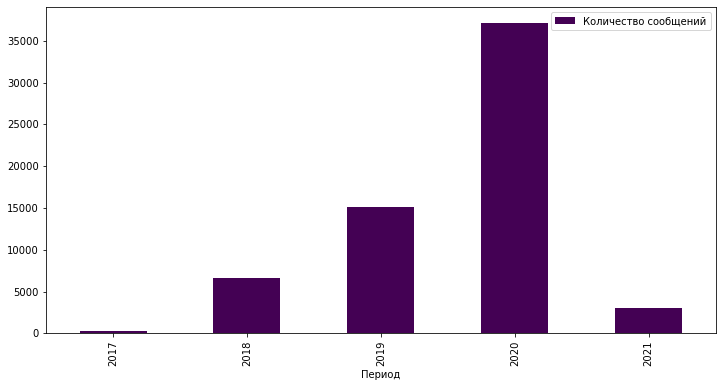

In [74]:
df[['year', 'text_reg_spell_stop_lem']].rename(columns={'text_reg_spell_stop_lem':'Количество сообщений', 'year':'Период'}).groupby('Период').count().plot(kind='bar', figsize=(12, 6), colormap='viridis')

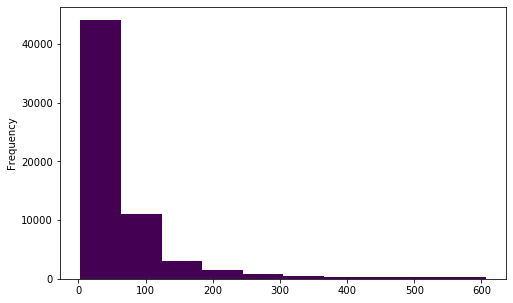

In [78]:
import numpy as np
import matplotlib.pyplot as plt
df.len_lem_text.plot(figsize=(8, 5), colormap='viridis', kind='hist')
#plt.title('Распределение длин сообщений')

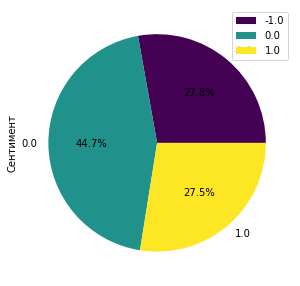

In [79]:
df[['label_1_1.0', 'text_reg_spell_stop_lem']].rename(columns={'text_reg_spell_stop_lem':'Сентимент'}).groupby('label_1_1.0').count().plot.\
pie(y='Сентимент', autopct="%.1f%%", figsize=(5, 5), colormap='viridis')

In [58]:
df['mean_vol'] = df.groupby(['ticker'])['vol'].transform('mean')
df.head()

,ticker,date,close,vol,volatility_5,change_close_1,message,src,text,day,month,year,day_of_week,text_reg_spell_stop_lem,len_lem_text,total_msg,mean_len,label_1_1.0,mean_vol
0,zvez,20210127.0,4.395,588000,0.151559,-3.981797,"ZVEZ может дернуть? Там объем 2,5 млн руб :-))",27,"zvez может дернуть? там объем 2,5 млн руб :-))",27,1,2021,2,дёрнуть объём млн руб,21,20,67.85,-1.0,115400.0
1,zvez,20210119.0,4.155,52000,0.036277,0.000000,Звёзд с неба не хватают,27,звезд с неба не хватают,19,1,2021,1,небо не хватать,15,20,67.85,0.0,115400.0
2,zvez,20201229.0,4.000,87000,0.019131,-0.625000,"м.. начинаем готовить группу изгоев, что будут...",26,"м.. начинаем готовить группу изгоев, что буду...",29,12,2020,1,м начинать готовить группа изгой изгнать стена...,250,20,67.85,0.0,115400.0
3,zvez,20201209.0,4.065,73000,0.005831,-1.107011,У тех кто занимается рекламой тут с головой бе...,28,у тех кто занимается рекламой тут с головой б...,9,12,2020,2,заниматься реклама голова беда скоро читать та...,82,20,67.85,-1.0,115400.0
4,zvez,20200924.0,4.570,82000,0.031401,1.531729,По презентации - да хорошая вышла ( не считая ...,25,по презентации - да хорошая вышла ( не считая...,24,9,2020,3,презентация да хороший выйти не считать пригла...,118,20,67.85,1.0,115400.0


In [84]:
# здесь агрегированные показатели
# mean_len средняя длина собщений
# total_msg колво сообщений по тикеру
# mean_vol средний объём торгов
df[['ticker', 'mean_len', 'total_msg', 'mean_vol']].drop_duplicates()

,ticker,mean_len,total_msg,mean_vol
0,zvez,67.850000,20,1.154000e+05
20,zill,59.052632,19,3.657000e+03
39,yndx,52.662116,3223,2.084483e+06
3262,vtbr,52.763535,6077,4.377220e+10
9339,vsmo,75.876923,65,1.103077e+03
9404,uwgn,38.925926,27,1.520663e+06
9431,usbn,56.849057,53,8.389906e+07
9484,urka,78.843137,51,6.564773e+05
9535,upro,59.785425,494,1.075406e+08
10029,ucss,90.181818,11,1.306000e+03


Text(0.5, 1.0, 'Распределение натурального логарифма количества сообщений по тикерам')

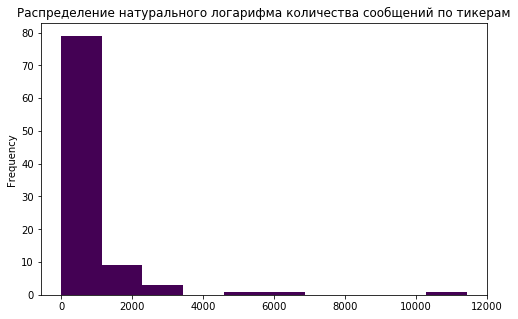

In [86]:
import numpy as np
import matplotlib.pyplot as plt
np.log(df[['ticker','total_msg']].drop_duplicates().total_msg).plot(figsize=(8, 5), colormap='plasma', kind='hist')
plt.title('Распределение натурального логарифма количества сообщений по тикерам')

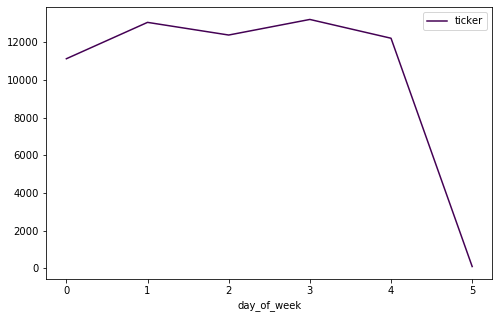

In [88]:
df[['day_of_week', 'ticker']].groupby('day_of_week').count().plot(colormap='viridis', figsize=(8, 5))
#plt.title('Распределение количества сообщений по дням недели')

In [90]:
print(df[['ticker', 'total_msg']].drop_duplicates().sort_values('total_msg'))

      ticker  total_msg
10340   tgkd          3
46956   hals          4
32069   rlmn          5
55702   amez          9
35070   paza         11
10029   ucss         11
20      zill         19
42991   mage         19
45309   krot         19
0       zvez         20
9404    uwgn         27
32074   rgss         31
55094   bspb         34
10228   trcn         35
55667   aptk         35
31955   rosb         39
55054   cbom         40
39273   mrkp         48
53491   fesh         49
9484    urka         51
43395   lnzl         52
9431    usbn         53
48211   gche         56
41263   mgts         56
39214   mrkv         59
35160   obuv         61
53540   fees         62
62012   abrd         65
9339    vsmo         65
46960   gtlc         69
48142   gema         69
31994   rolo         75
10263   tors         77
10482   tgka         78
35081   ogkb         79
53602   etln         97
16673   selg        115
14643   tanl        117
39096   msng        118
57207   agro        125
10343   tgkb    